In [4]:
import sys

import os
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sys.path.append("../")
from utils import load_data, StrokeParams, FetalHealthParams
from step_01_clustering.plotting import silhouette_plot, plot_tsne_clusters, plot_pca_results

RANDOM_STATE = 666
FETAL_GMM_CLUSTERS = 2
FETAL_KMEANS_CLUSTERS = 2
STROKE_GMM_CLUSTERS = 2
STROKE_KMEANS_CLUSTERS = 2

if __name__ == "__main__":
    X_stroke, y_stroke = load_data(StrokeParams.data_train, StrokeParams.target_column)
    X_fetal, y_fetal = load_data(
        FetalHealthParams.data_train, FetalHealthParams.target_column
    )

    X_stroke = X_stroke.drop(columns=StrokeParams.cat_cols)
    X_fetal = X_fetal.drop(columns=FetalHealthParams.cat_cols)

For gmm with 2 clusters in Stroke Prediction, the average silhouette_score is: 0.27647885178019754


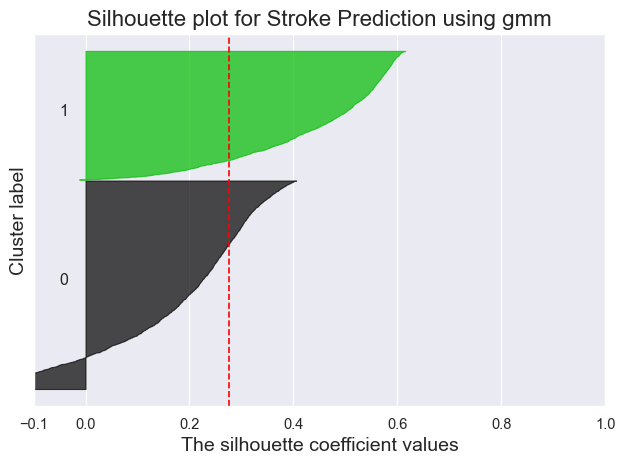

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For kmeans with 2 clusters in Stroke Prediction, the average silhouette_score is: 0.2953807495764465


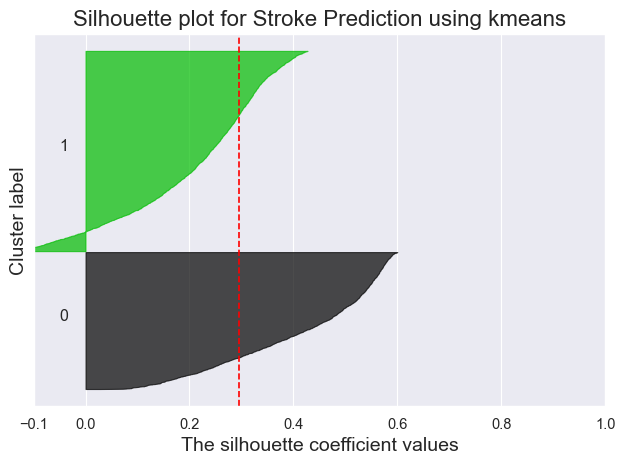

/Users/aaron/Projects/cs-7641-machine-learning/unsupervised_learning/step_01_clustering/../step_01_clustering/plotting.py:120: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(
/Users/aaron/Projects/cs-7641-machine-learning/unsupervised_learning/step_01_clustering/../step_01_clustering/plotting.py:134: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(
/Users/aaron/Projects/cs-7641-machine-learning/unsupervised_learning/step_01_clustering/../step_01_clustering/plotting.py:158: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


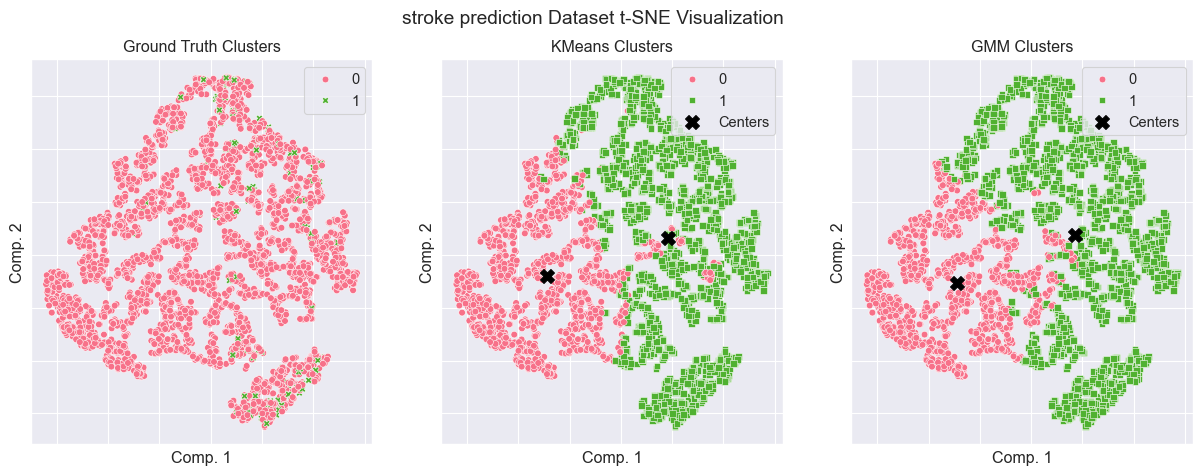

In [3]:
if __name__ == "__main__":
    silhouette_plot(
        X_stroke,
        STROKE_GMM_CLUSTERS,
        algorithm="gmm",
        dataset_name="stroke prediction".title(),
    )

    silhouette_plot(
        X_stroke,
        STROKE_KMEANS_CLUSTERS,
        algorithm="kmeans",
        dataset_name="stroke prediction".title(),
    )

    tsne = TSNE(n_components=2, random_state=RANDOM_STATE)
    strokeX_tsne = tsne.fit_transform(X_stroke)

    plot_tsne_clusters(
        X_original=X_stroke,
        X_tsne=strokeX_tsne,
        true_labels=y_stroke,
        title="stroke prediction Dataset t-SNE Visualization",
        filename="stroke_clusters_tsne.png",
        n_clusters=STROKE_KMEANS_CLUSTERS,
        n_components=STROKE_GMM_CLUSTERS,
        random_state=RANDOM_STATE,
    )

/Users/aaron/Projects/cs-7641-machine-learning/unsupervised_learning/step_01_clustering/../step_01_clustering/plotting.py:225: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(
/Users/aaron/Projects/cs-7641-machine-learning/unsupervised_learning/step_01_clustering/../step_01_clustering/plotting.py:234: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


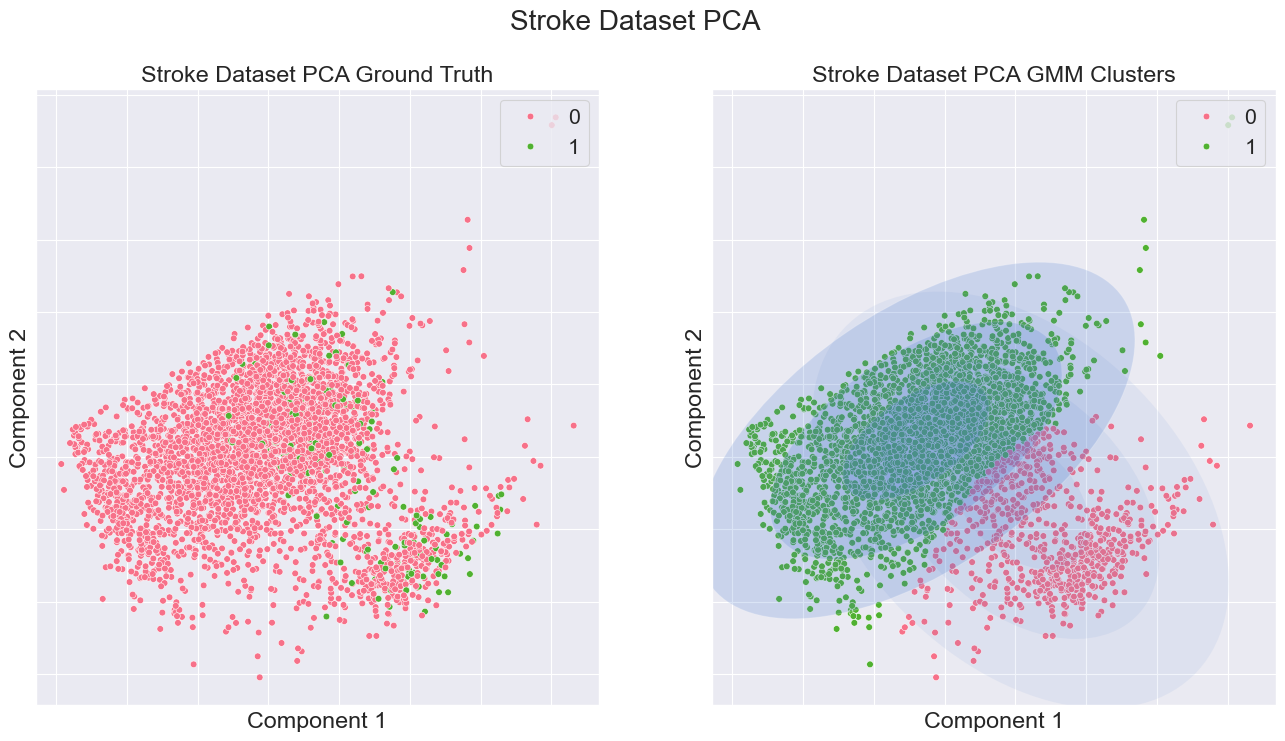

In [5]:
if __name__ == "__main__":
    pca = PCA(n_components=2, random_state=RANDOM_STATE)
    X_stroke_pca = pca.fit_transform(X_stroke)

    stroke_gmm = GaussianMixture(
        n_components=STROKE_GMM_CLUSTERS, random_state=RANDOM_STATE
    )
    stroke_gmm_labels = stroke_gmm.fit_predict(X_stroke_pca)
    plot_pca_results(
        X_stroke_pca,
        y_stroke,
        stroke_gmm_labels,
        stroke_gmm,
        "Stroke Dataset PCA",
        os.path.join(f"stroke_pca.png"),
    )

For gmm with 2 clusters in Fetal Health, the average silhouette_score is: 0.2897605128891284


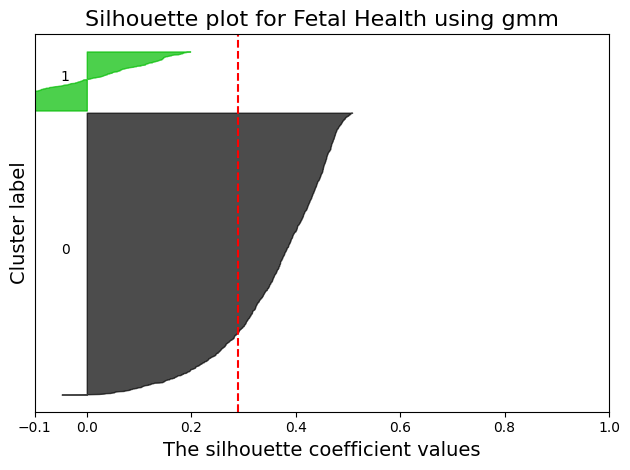

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For kmeans with 2 clusters in Fetal Health, the average silhouette_score is: 0.19995458835085733


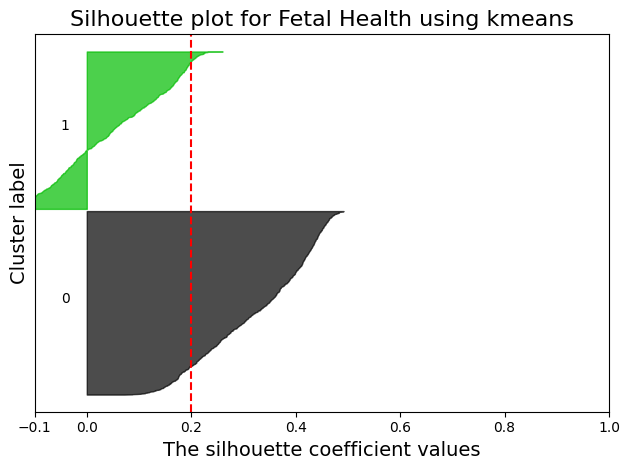

/Users/aaron/Projects/cs-7641-machine-learning/unsupervised_learning/step_01_clustering/../step_01_clustering/plotting.py:134: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(
/Users/aaron/Projects/cs-7641-machine-learning/unsupervised_learning/step_01_clustering/../step_01_clustering/plotting.py:158: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


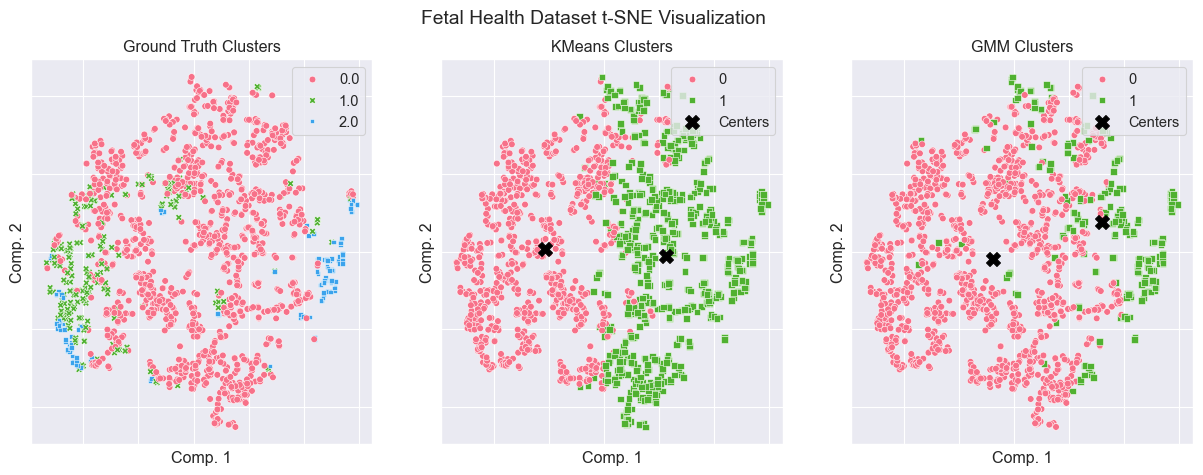

In [2]:
if __name__ == "__main__":
    silhouette_plot(
        X_fetal,
        FETAL_GMM_CLUSTERS,
        algorithm="gmm",
        dataset_name="fetal health".title(),
    )

    silhouette_plot(
        X_fetal,
        FETAL_KMEANS_CLUSTERS,
        algorithm="kmeans",
        dataset_name="fetal health".title(),
    )

    tsne = TSNE(n_components=2, random_state=RANDOM_STATE)
    fetalX_tsne = tsne.fit_transform(X_fetal)

    plot_tsne_clusters(
        X_original=X_fetal,
        X_tsne=fetalX_tsne,
        true_labels=y_fetal,
        title="Fetal Health Dataset t-SNE Visualization",
        filename="fetal_clusters_tsne.png",
        n_clusters=FETAL_KMEANS_CLUSTERS,
        n_components=FETAL_GMM_CLUSTERS,
        random_state=RANDOM_STATE,
    )

/Users/aaron/Projects/cs-7641-machine-learning/unsupervised_learning/step_01_clustering/../step_01_clustering/plotting.py:234: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


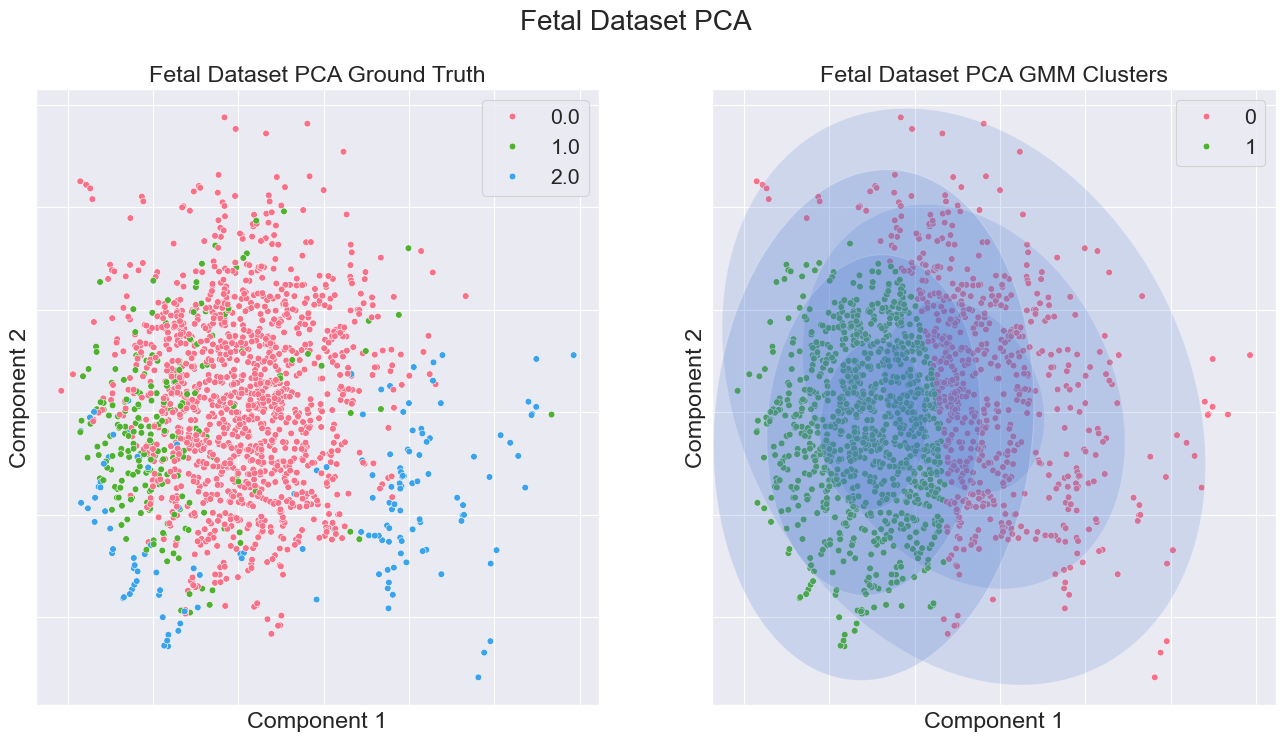

In [6]:
if __name__ == "__main__":
    pca = PCA(n_components=2, random_state=RANDOM_STATE)
    X_fetal_pca = pca.fit_transform(X_fetal)

    fetal_gmm = GaussianMixture(
        n_components=FETAL_GMM_CLUSTERS, random_state=RANDOM_STATE
    )
    fetal_gmm_labels = fetal_gmm.fit_predict(X_fetal_pca)
    plot_pca_results(
        X_fetal_pca,
        y_fetal,
        fetal_gmm_labels,
        fetal_gmm,
        "Fetal Dataset PCA",
        os.path.join(f"fetal_pca.png"),
    )